Lambda School Data Science

---

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [787]:
# Import Data
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

In [788]:
df.shape

(421, 65)

In [789]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,87.000000,87.000000,414.000000,418.000000,22.000000,22.000000,283.000000,281.000000,281.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,0.0
mean,3.887356,4.167816,7.067343,3.495335,546.181818,0.675277,20.038233,22.135765,0.786477,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,NaN
std,0.475396,0.373698,1.506742,0.812069,144.445619,0.080468,2.083518,1.779408,0.152531,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,NaN
75%,4.000000,4.400000,7.880000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [790]:
df.head(2)

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        421 non-null    object 
 1   Burrito         421 non-null    object 
 2   Date            421 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            414 non-null    float64
 10  Hunger          418 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          283 non-null    float64
 14  Circum          281 non-null    float64
 15  Volume          281 non-null    float64
 16  Tortilla        421 non-null    float64
 17  Temp            401 non-null    flo

Regrettably, some features are just not supported by a meaningful number of observations

In [792]:
observations_to_drop = ['Queso', 'Carrots', 'Ham', 'Lobster', 'Sushi', 'Corn', 'Zucchini', 'Bacon', 'Mushroom' ]
df.drop(observations_to_drop, axis=1, inplace=True)

### Conduct exploratory data analysis (EDA)

Get the column names:

In [793]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Chile relleno',
       'Nopales', 'Egg', 'Avocado', 'Great'],
      dtype='object')

Check if there are any missing values in the target column, `'Great'`:

In [794]:
df.Great.isnull().sum()

0

Check if the samples are balanced:

In [795]:
df.Great.replace({False: 0, True: 1}, inplace=True)

Visual representation of the target column: 1 for `'True'` and 0 for `'False'`:

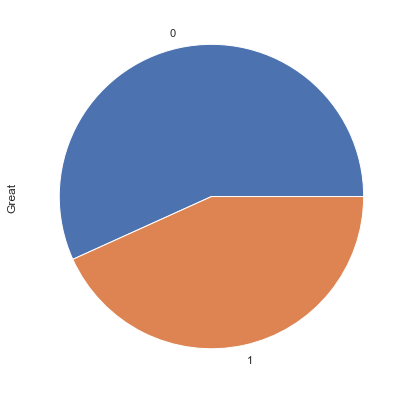

In [796]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
sns.set(rc={'figure.figsize':(18, 14)})
%matplotlib inline

df.groupby(['Great'])['Great'].count().plot(kind='pie')
plt.gcf().set_size_inches(12, 7)
plt.show()

Some data are categorical as reflected in the list below:

In [797]:
categorical = ['Location','Burrito', 'Neighborhood', 'Address']

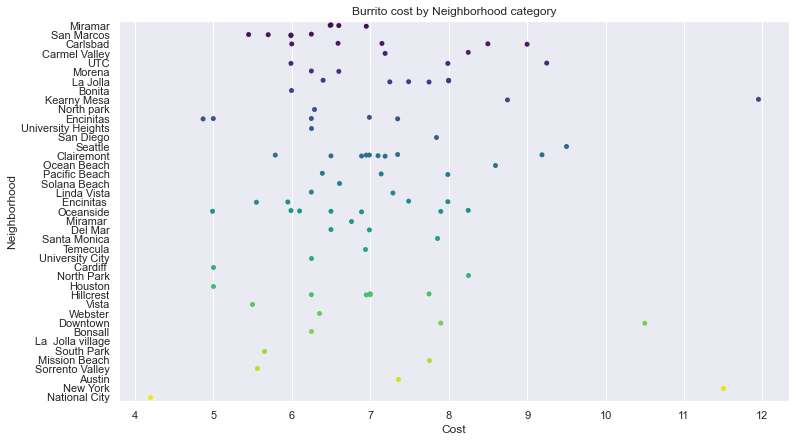

In [798]:
sns.stripplot(y='Neighborhood', x='Cost', data=df, dodge=True, palette='viridis')
plt.title("Burrito cost by Neighborhood category", fontsize=12)
plt.gcf().set_size_inches(12, 7)

Note, some features are nominal coded with 'X' or 'x'; some are ordinal like ratings, and others are measured on an interval scale. Select respective feature names in the following lists: `nominal`, `ordinal`, and `interval`.

In [801]:
nominal = ['Chips','Beef', 'Pico', 'Guac', 'Cheese',
               'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
               'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Cabbage',
               'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple',
               'Chile relleno', 'Nopales', 'Egg', 'Avocado']


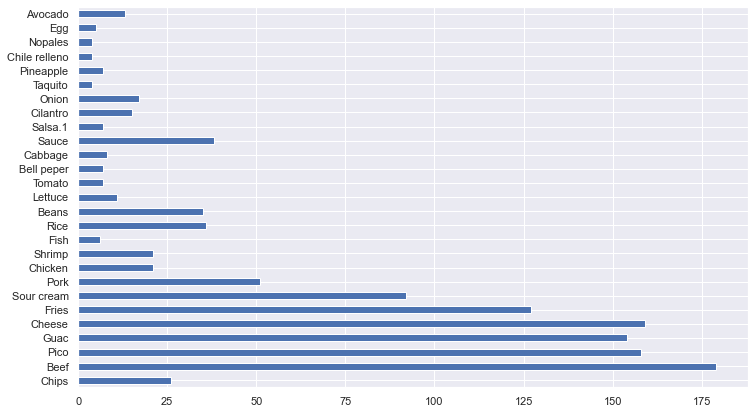

In [802]:
df[nominal].count().plot(kind='barh')
plt.gcf().set_size_inches(12, 7)
plt.show()

It is easier to work with numbers, replace the coding convention.

In [781]:
df[nominal] = df[nominal].replace({'No': 0, 'Yes': 1, 'x': 1, 'X':1})
df[nominal] = df[nominal].fillna(0)

Check features on ordinary scale (i.e. ratings), expected scale from 0 to 5:

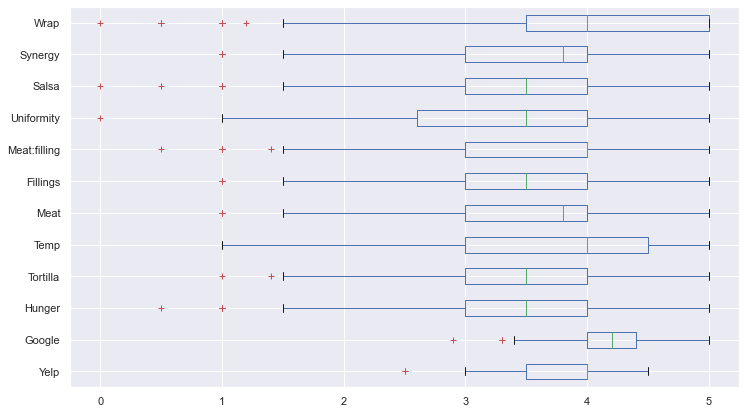

In [803]:
ordinal = ['Yelp', 'Google', 'Hunger', 'Tortilla', 
           'Temp', 'Meat', 'Fillings', 'Meat:filling', 
           'Uniformity', 'Salsa', 'Synergy', 'Wrap']

df[ordinal].plot(kind="box", vert=False, sym='r+')
plt.gcf().set_size_inches(12, 7)
plt.show()

Note several continuous variables measured on an interval scale:

In [804]:
interval = ['Cost', 'Mass (g)', 'Density (g/mL)', 'Length', 'Circum', 'Volume']

Correlations are available for this data type

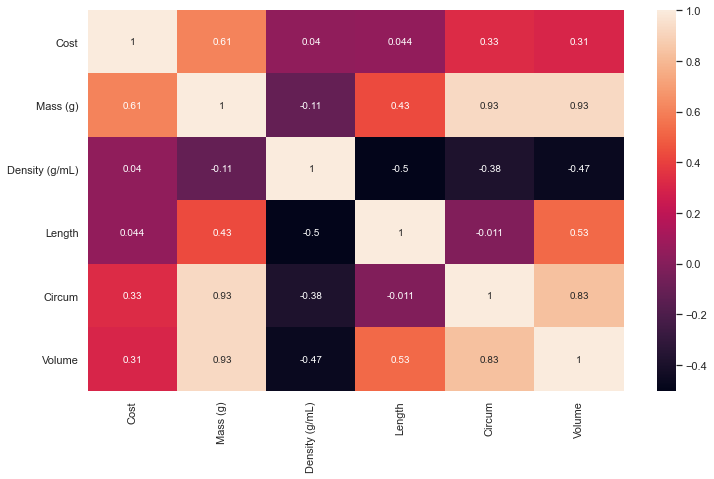

In [805]:
sns.heatmap(df[interval].corr(), annot=True)
plt.gcf().set_size_inches(12, 7)
plt.show()

Compare two possibly strong explanatory variables: `'Cost'` and `'Hunger'`

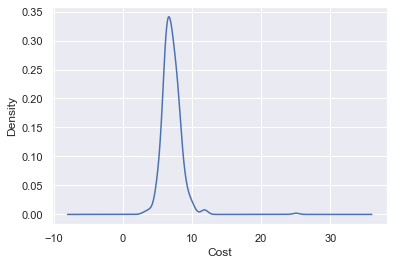

In [806]:
ax = df[interval[0]].plot(kind='kde')
ax.set(xlabel=continuous[0])
plt.show()


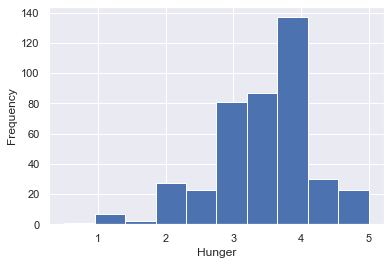

In [807]:
ax = df[ordinal[2]].plot(kind='hist')
ax.set(xlabel=ordinal[2])
plt.show()

They can be good inputs for the baseline Naive Classifier.

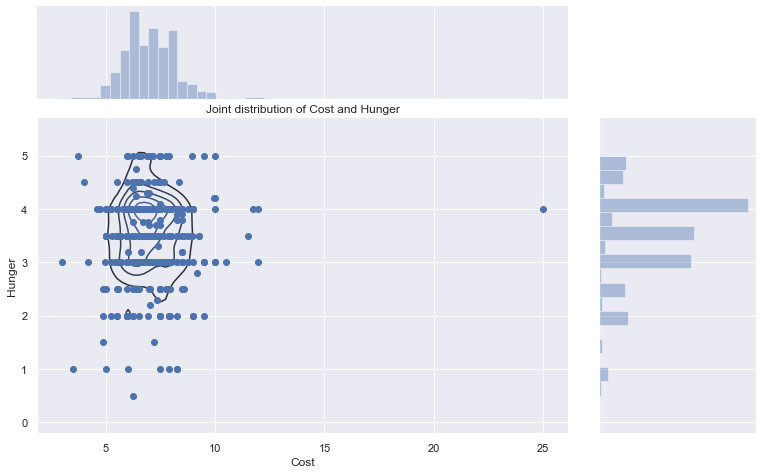

In [808]:
sns.jointplot(continuous[0], 
              ordinal[2], 
              data=df,
              height=5, 
              ratio=3, 
              color="b"
             ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.gcf().set_size_inches(12, 7)
plt.title("Joint distribution of Cost and Hunger", fontsize=12)
plt.show()

### Clean data

Convert Date string to datetime object

In [809]:
df.Date.head(2)

0    1/18/2016
1    1/24/2016
Name: Date, dtype: object

In [810]:
df.Date = pd.to_datetime(df.Date)

In [811]:
df.Date

0     2016-01-18
1     2016-01-24
2     2016-01-24
3     2016-01-24
4     2016-01-27
         ...    
416   2019-08-27
417   2019-08-27
418   2019-08-27
419   2019-08-27
420   2019-08-27
Name: Date, Length: 421, dtype: datetime64[ns]

In [812]:
df = df.reset_index()

Check for missing data and NaNs in ordinal and interval features. Divide by total number of observations to get an idea of missing values proportion.

In [813]:
df[ordinal+interval].isnull().sum().sort_values() / len(df)

Tortilla          0.000000
Uniformity        0.004751
Synergy           0.004751
Hunger            0.007126
Fillings          0.007126
Wrap              0.007126
Cost              0.016627
Meat:filling      0.021378
Meat              0.033254
Temp              0.047506
Salsa             0.059382
Length            0.327791
Volume            0.332542
Circum            0.332542
Google            0.793349
Yelp              0.793349
Mass (g)          0.947743
Density (g/mL)    0.947743
dtype: float64

Below is the list of potentially good features, only around 3% or less of observations seem to be missing - can be dropped or imputed. In order to avoid the data leak, imputing of missing values should be done after train/test split.Dropping, on the other hand, may be done before the split.

In [818]:
features = ['Tortilla', 'Uniformity', 'Synergy', 'Hunger', 'Fillings', 'Wrap', 'Cost', 'Meat:filling', 'Meat']

In [819]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tortilla      421 non-null    float64
 1   Uniformity    419 non-null    float64
 2   Synergy       419 non-null    float64
 3   Hunger        418 non-null    float64
 4   Fillings      418 non-null    float64
 5   Wrap          418 non-null    float64
 6   Cost          414 non-null    float64
 7   Meat:filling  412 non-null    float64
 8   Meat          407 non-null    float64
dtypes: float64(9)
memory usage: 29.7 KB


In [820]:
import numpy as np
df[df[features].replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
cleaned_df = df[features+['Date', 'Great']].dropna()

In [821]:
len(cleaned_df)

391

In [822]:
cleaned_df.head(2)

,Tortilla,Uniformity,Synergy,Hunger,Fillings,Wrap,Cost,Meat:filling,Meat,Date,Great
0,3.0,4.0,4.0,3.0,3.5,4.0,6.49,4.0,3.0,2016-01-18,0
1,2.0,4.0,2.5,3.5,2.5,5.0,5.45,2.0,2.5,2016-01-24,0


In [823]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 420
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tortilla      391 non-null    float64       
 1   Uniformity    391 non-null    float64       
 2   Synergy       391 non-null    float64       
 3   Hunger        391 non-null    float64       
 4   Fillings      391 non-null    float64       
 5   Wrap          391 non-null    float64       
 6   Cost          391 non-null    float64       
 7   Meat:filling  391 non-null    float64       
 8   Meat          391 non-null    float64       
 9   Date          391 non-null    datetime64[ns]
 10  Great         391 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 36.7 KB


### Do train/validate/test split

Train on reviews from 2016 & earlier (expected 298 instances):

In [824]:
X_train = cleaned_df.loc[cleaned_df.Date < '2017'].copy()
y_train = X_train.pop('Great')

Validate on 2017 (expected 85 instances):

In [825]:
X_validate = cleaned_df.loc[(cleaned_df.Date > '2017') & (cleaned_df.Date < '2018')].copy()
y_validate = X_validate.pop('Great')

Test on 2018 & later (expected 38 instances):

In [826]:
X_test = cleaned_df.loc[cleaned_df.Date > '2018'].copy()
y_test = X_test.pop('Great')

### Determine baseline accuracy for a naïve classification model

Predicting Greatness from selected 9 features only

In [827]:
X_train.drop('Date', axis=1, inplace=True)

Input array is ready for model training 

In [828]:
X_train.isnull().values.any()

False

In [829]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 298
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tortilla      277 non-null    float64
 1   Uniformity    277 non-null    float64
 2   Synergy       277 non-null    float64
 3   Hunger        277 non-null    float64
 4   Fillings      277 non-null    float64
 5   Wrap          277 non-null    float64
 6   Cost          277 non-null    float64
 7   Meat:filling  277 non-null    float64
 8   Meat          277 non-null    float64
dtypes: float64(9)
memory usage: 21.6 KB


In [830]:
from sklearn.linear_model import LogisticRegression

baseline_clf = LogisticRegression(random_state=123).fit(X_train, y_train)

In [831]:
X_validate.drop('Date', axis=1, inplace=True)
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 301 to 383
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tortilla      80 non-null     float64
 1   Uniformity    80 non-null     float64
 2   Synergy       80 non-null     float64
 3   Hunger        80 non-null     float64
 4   Fillings      80 non-null     float64
 5   Wrap          80 non-null     float64
 6   Cost          80 non-null     float64
 7   Meat:filling  80 non-null     float64
 8   Meat          80 non-null     float64
dtypes: float64(9)
memory usage: 6.2 KB


Use AUC to check the overall predictive poor of the model; 50% being a random chance

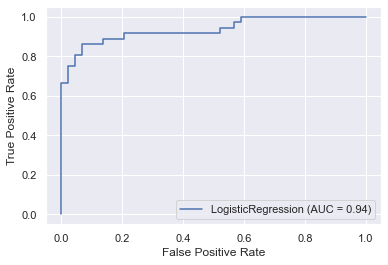

In [832]:
from sklearn.metrics import plot_roc_curve
baseline_clf_auc_ins = plot_roc_curve(baseline_clf, X_validate, y_validate)
plt.grid(True)
plt.show()

In [833]:
X_test.drop('Date', axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 77 to 420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tortilla      34 non-null     float64
 1   Uniformity    34 non-null     float64
 2   Synergy       34 non-null     float64
 3   Hunger        34 non-null     float64
 4   Fillings      34 non-null     float64
 5   Wrap          34 non-null     float64
 6   Cost          34 non-null     float64
 7   Meat:filling  34 non-null     float64
 8   Meat          34 non-null     float64
dtypes: float64(9)
memory usage: 2.7 KB


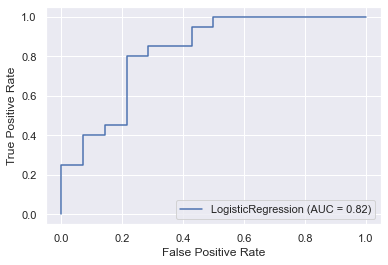

In [834]:
baseline_clf_auc_oos = plot_roc_curve(baseline_clf, X_test, y_test)
plt.grid(True)
plt.show()

Baseline model accuracy score is poor:

In [835]:
print('Baseline traing accuracy: ', np.round(baseline_clf.score(X_train, y_train), 4))
print('Baseline validation accuracy: ', np.round(baseline_clf.score(X_validate, y_validate), 4))
print('Baseline oos testing accuracy: ', np.round(baseline_clf.score(X_test, y_test), 4))

Baseline traing accuracy:  0.8736
Baseline validation accuracy:  0.8375
Baseline oos testing accuracy:  0.7941


### Create a `scikit-learn` pipeline

- A one hot encoder for categorical features.
- A scaler.
- A logistic regressor.

In [838]:
pd.get_dummies(df[categorical[1]])

,2 in 1,619 Burrito Original,Addiction,Ado-haba california,Adobada,Adobada,Adobado,Al Pastor,Al pastor,Al pastor,...,Tijuana,Tilapia one,Veg Out,Vegetarian,Veggie,battered fish,carne asada,carne asada,combo chicken,fried fish
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One hot encoding
df_nyc_onehot = pd.get_dummies(df_nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
df_nyc_onehot['Zip'] = df_nyc_venues['Zip'] 

# Move neighborhood column to the first column
fixed_columns = [df_nyc_onehot.columns[-1]] + list(df_nyc_onehot.columns[:-1])
df_nyc_onehot = df_nyc_onehot[fixed_columns]

df_nyc_onehot.head()

### Train model using training data

### Create visualization of model coefficients

### Get model's validation accuracy

### Get your model's test accuracy